## Final Project Submission

Please fill out:
* Student name: Cristina Mulas
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [171]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
# the most correlation  and eveling distributed
# do the summaries for all of these
 #bathrooms , sqft_living , grade ,sqft_above  and sqft_living15 
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
# np.log(np.log())

In [244]:
# read the file
df = pd.read_csv('kc_house_data.csv')
#see the first five rows
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [173]:
# see the last five rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


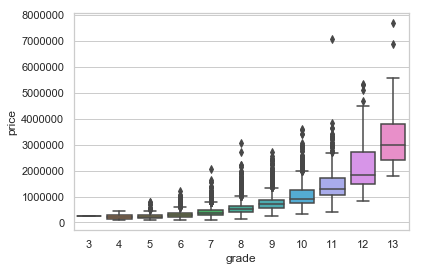

In [258]:
# grade , view , zipc
#ZIPCODE
sns.boxplot(x="grade", y="price", data= df)

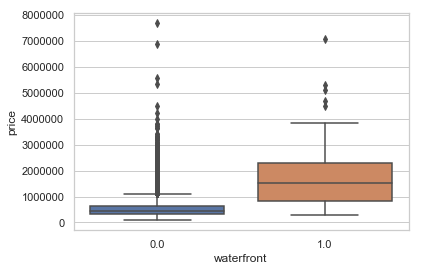

In [261]:
#GRADE
#df.waterfront.value_counts()
sns.boxplot(x="waterfront", y="price", data= df)

In [288]:
# df.bathrooms.value_counts()


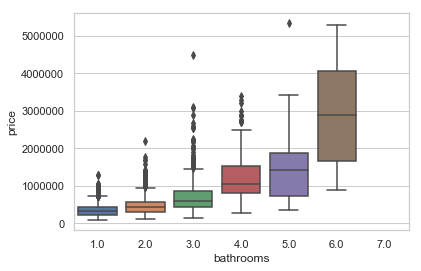

In [287]:
#view 
sns.boxplot(x="bathrooms", y="price", data= df, order=np.arange(1,7.5))

In [290]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

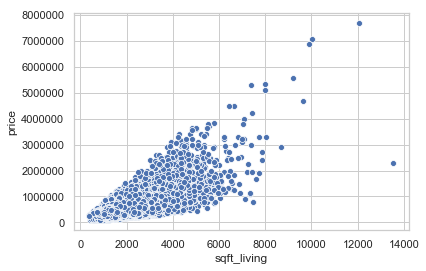

In [292]:
#bathrooms , sqft_living , grade ,sqft_above  and sqft_living15 
#LIVING ROOM
sns.scatterplot(x="sqft_living", y="price", data=df)


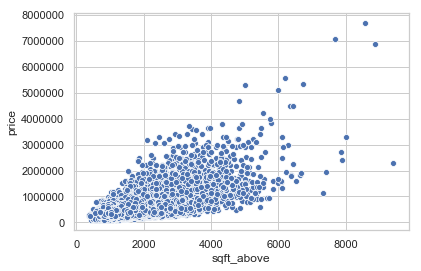

In [294]:
#ABOVE
sns.scatterplot(x= "sqft_above", y="price", data=df)


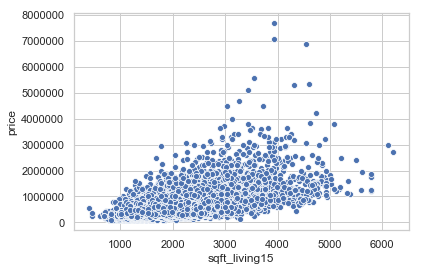

In [296]:

sns.scatterplot(x= "sqft_living15", y="price", data=df)


In [175]:
# descriptibe statistics for all columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [176]:
# DATA CLEANING
# it gives you the sum of null values in a column
df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [177]:
# view missing values
df.view.isnull().sum()
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [237]:
max(df.bedrooms)
max(df.bathrooms)

6.75

In [243]:
# repleace the NA values with zero values since we have many zeros values
df.view.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12867 entries, 1 to 21595
Data columns (total 22 columns):
id               12867 non-null int64
date             12867 non-null datetime64[ns]
price            12867 non-null float64
bedrooms         12867 non-null int64
bathrooms        12867 non-null float64
sqft_living      12867 non-null int64
sqft_lot         12867 non-null int64
floors           12867 non-null float64
waterfront       12867 non-null float64
view             12867 non-null float64
condition        12867 non-null int64
grade            12867 non-null int64
sqft_above       12867 non-null int64
sqft_basement    12867 non-null float64
yr_built         12867 non-null int64
yr_renovated     10623 non-null float64
zipcode          12867 non-null int64
lat              12867 non-null float64
long             12867 non-null float64
sqft_living15    12867 non-null int64
sqft_lot15       12867 non-null int64
weekday          12867 non-null int64
dtypes: datetime64[ns](1), f

In [242]:

# df will only include 2-5 bedrooms houses
# df= df[(df['bedrooms'] <= 5)]
# df =df[(df['bathrooms'] >=2)]
#box plot for categorcal values



HTTPError: HTTP Error 404: Not Found

In [179]:
# Ckeck maybe remove latter
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [180]:
# waterfront missing values
df.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [181]:
## repleace the NA values with zero values since we have many zeros values
df.waterfront.fillna(0,inplace=True)

In [182]:
#to check it mayb remove latter
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [183]:
# year_renovated missing values
# convert categorical values into numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


In [184]:
# replace the '?' to NA
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)


In [185]:
# replace NA value to the median
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

In [186]:
# to check it
df.sqft_basement[6]

700.0

In [187]:
#In which days houses are the most selling?
#check out the type of the column
df.date.dtype

dtype('O')

In [188]:
# only one year of diference
df.date.max()
df.date.min()

'1/10/2015'

In [189]:
#converted into datetime
df['date'] = pd.to_datetime(df['date'])

In [190]:
# to ckeck
df.date.head()


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [192]:
#create a column that uses the timestamp to determine day of the week
df['weekday'] = df['date'].dt.dayofweek # days of the week converted to numbers

days = df.weekday.value_counts()
   






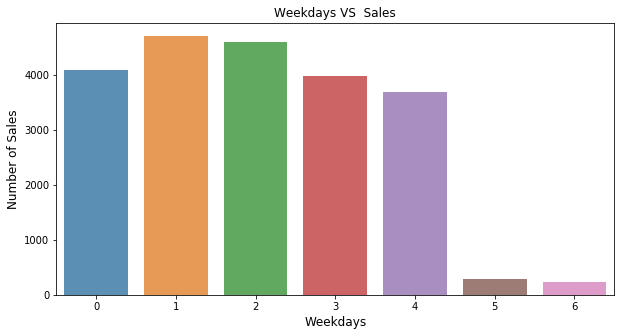

In [194]:

days = df.weekday.value_counts() # frequency
days_count = days[:10,]
plt.figure(figsize=(10,5))
sns.barplot(days_count.index, days_count.values, alpha=0.8)
plt.title('Weekdays VS  Sales')
plt.ylabel('Number of Sales', fontsize=12)
plt.xlabel('Weekdays', fontsize=12)
plt.show()

NameError: name 'df_dayweek' is not defined

In [ ]:
# plt.hist(df_dayweek)


In [ ]:
# correlation
corr = df.corr()

In [ ]:
sns.heatmap(abs(corr), cmap ="YlGnBu",linewidths=.5 )

In [ ]:
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
df.price = np.log(df.price)
df.sqft_above = np.log(df.sqft_basement)


In [ ]:
sns.heatmap(abs(corr), cmap ="YlGnBu",linewidths=.5 )

In [ ]:
#data frame filter by 0.75 loop up these values correlated 
df.corr()[(df.corr() >.75)]

In [203]:
# pd.plotting.scatter_matrix(df, figsize =[10 ,10])
import statsmodels.formula.api as smf

model = smf.ols('price ~ bathrooms', df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:28:10   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.1

In [ ]:
array([[1.11370611e-06]])

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

def jarque_bera(col):
    f = 'price~{}'.format(col)
    model = smf.ols(formula=f, data=df).fit()

      resid1 = model.resid
        fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
        fig.show()

    # JB test for TV
      name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
          test = sms.jarque_bera(model.resid)
          list(zip(name, test))

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['price']].values #  reshape data using .values
y = df[['bathrooms','grade']].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3) #slip the data
model = LinearRegression() # create the model
model.fit(xTrain, yTrain) # train the model
yPrediction = linearRegressor.predict(xTest) 
yPrediction


array([[2.39405460e+03, 2.30968843e+00],
       [1.71508380e+03, 1.88592198e+00],
       [1.92759917e+03, 2.01855932e+00],
       ...,
       [2.47870763e+03, 2.36252298e+00],
       [2.12022799e+03, 2.13878486e+00],
       [2.66183457e+03, 2.47681811e+00]])

In [215]:
c = model.coef_
c



array([[1.10175439e-06],
       [2.17491602e-06]])

In [216]:
m = model.intercept_
m

# m = np.squeeze(np.asarray(m))
# m

array([1.5206001 , 6.48602238])

In [222]:
xTest


array([[368000.],
       [430000.],
       [267000.],
       ...,
       [324950.],
       [529900.],
       [619100.]])

In [225]:
# I want to predic the prize of a house that have 
model.predict(np.array([[3],[5]]))


array([[1.52060341, 6.48602891],
       [1.52060561, 6.48603326]])

In [24]:
# sns.scatterpllot(np.log)

In [165]:
#df['sqft_basement'][6] 
#df.sqft_basement.value_counts()
#col_med = df.sqft_basement.median()

In [166]:
col_med

NameError: name 'col_med' is not defined

In [167]:
# df.plot.kde()

In [168]:
df.p

AttributeError: 'DataFrame' object has no attribute 'p'

In [169]:
df.hist(bins = 50 , fi)

SyntaxError: positional argument follows keyword argument (<ipython-input-169-a29c210dd053>, line 1)

In [170]:
#normalize the prize and all sqrfodos # do the logs to normalize the dataaa
df.price = np.log(df.price)
df.sqft_above = np.log(df.sqft_basement)
df.

SyntaxError: invalid syntax (<ipython-input-170-715c0e0c8038>, line 4)